# The key features of PyTorch

# Creating a graph in PyTorch

In [1]:
# import torch

# def compute_z(a, b, c):
#     r1 = torch.sub(a, b)
#     r2 = torch.mul(r1, 2)
#     z = torch.add(r2, c)
#     return z

In [2]:
# print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

In [3]:
# print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

In [4]:
# print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

# PyTorch tensor objects for storing and updating model parameters

In [5]:
# a = torch.tensor(3.14, requires_grad=True)
# print(a)

In [6]:
# b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
# print(b)

In [7]:
# w = torch.tensor([1.0, 2.0, 3.0])
# print(w.requires_grad)

In [8]:
# w.requires_grad_()
# print(w.requires_grad)

In [9]:
# import torch.nn as nn

# torch.manual_seed(1)
# w = torch.empty(2, 3)
# nn.init.xavier_normal_(w)
# print(w)

In [10]:
# class MyModule(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.w1 = torch.empty(2, 3, requires_grad=True)
#         nn.init.xavier_normal_(self.w1)
#         self.w2 = torch.empty(1, 2, requires_grad=True)
#         nn.init.xavier_normal_(self.w2)

In [11]:
# w = torch.tensor(1.0, requires_grad=True)
# b = torch.tensor(0.5, requires_grad=True)
# x = torch.tensor([1.4])
# y = torch.tensor([2.1])
# z = torch.add(torch.mul(w, x), b)
# loss = (y-z).pow(2).sum()
# loss.backward()
# print('dL/dw: ', w.grad)
# print('dL/db: ', b.grad)

In [12]:
# # verifying the computed gradient
# print(2 * x * ((w * x + b) - y))

In [13]:
# print(2 * ((w * x + b) - y))

# Implementing models based on nn.Sequential

In [14]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [15]:
l = nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

In [16]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

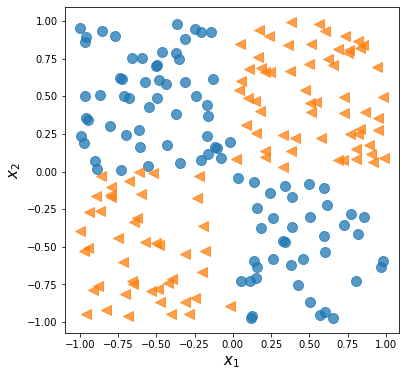

In [17]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [18]:
# model = nn.Sequential(
#     nn.Linear(2, 1),
#     nn.Sigmoid())

# model

# loss_fn = nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [19]:
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)


loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [20]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
print(list(train_dl))

[[tensor([[ 0.0493,  0.8496],
        [ 0.8550, -0.3045]]), tensor([1., 0.])], [tensor([[ 0.8068,  0.1474],
        [-0.7065, -0.8153]]), tensor([1., 1.])], [tensor([[-0.1654,  0.1174],
        [-0.4794,  0.6095]]), tensor([0., 0.])], [tensor([[ 0.4230, -0.7515],
        [-0.1616,  0.3704]]), tensor([0., 0.])], [tensor([[-0.1660,  0.4406],
        [ 0.9158,  0.0663]]), tensor([0., 1.])], [tensor([[0.7666, 0.2473],
        [0.7201, 0.0777]]), tensor([1., 1.])], [tensor([[ 0.7719, -0.2855],
        [ 0.2336,  0.8980]]), tensor([0., 1.])], [tensor([[-0.9452,  0.3409],
        [-0.6553, -0.7257]]), tensor([0., 1.])], [tensor([[-0.3653,  0.9772],
        [ 0.8172, -0.4128]]), tensor([0., 0.])], [tensor([[0.3730, 0.6693],
        [0.9400, 0.6937]]), tensor([1., 1.])], [tensor([[-0.7214,  0.6148],
        [ 0.5019, -0.3022]]), tensor([0., 0.])], [tensor([[-0.9943,  0.2343],
        [ 0.1221, -0.9627]]), tensor([0., 0.])], [tensor([[ 0.1715,  0.9392],
        [-0.1837, -0.5259]]), tensor([1., 

In [21]:
torch.manual_seed(1)
num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * 2  # ?
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
           accuracy_hist_train, accuracy_hist_valid


history = train(model, num_epochs, train_dl, x_valid, y_valid)

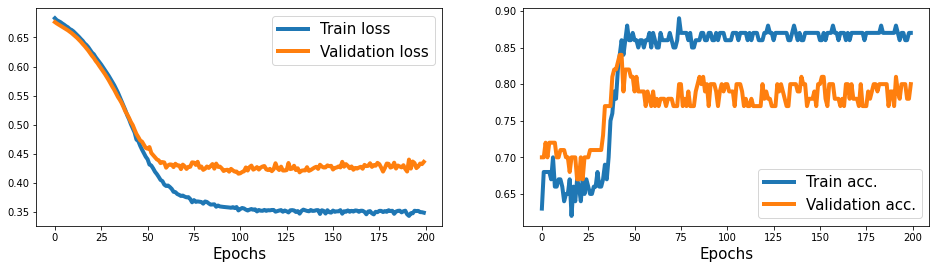

In [22]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
# print(history[0])
plt.plot(history[0], lw=4)
# print(history[1])
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()

In [23]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [24]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

# Making model building more flexible with nn.Module

In [27]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
    
    
model = MyModule()

model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [28]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

C:\Users\PipBoy3000\AppData\Local\Temp\ipykernel_5500\638413248.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


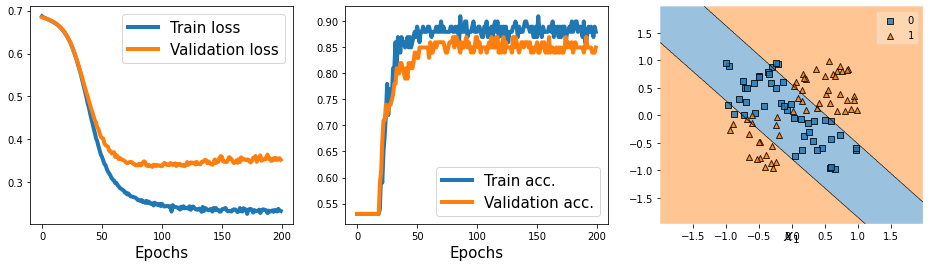

In [30]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.integer),
                      clf=model)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_xlabel(r'$x_1$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()